# SBI Life insurance Dataset

This is "SBI Insurance Claim Prediction Dataset" which based on "[Medical Cost Personal Datasets][1]" to update sample value on top.

age : age of policyholder 
sex: gender of policy holder (female=0, male=1) 
bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 25 steps: average walking steps per day of policyholder 
children: number of children / dependents of policyholder 
smoker: smoking state of policyholder (non-smoke=0;smoker=1) 
region: the residential area of policyholder in the US (northeast=0, northwest=1, southeast=2, southwest=3) 
charges: individual medical costs billed by health insurance 
insuranceclaim: yes=1, no=0

Conclusion

As we see from the details. It is related to Classifition supervised learning where prediction is on claim(Insurance claim)
So, Sbi will predict to whom they provide claim.


target = Insuranceclaim



In [31]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report,roc_curve,auc
import warnings

warnings.filterwarnings('ignore')

In [32]:
sbi = pd.read_csv("SBI_Life_insurance.csv")

In [33]:
print(sbi.shape)

print(sbi.info())

print(sbi.head(10))


print(sbi.isnull().sum())


print(sbi.dtypes)



print(sbi.describe())


print(sbi.skew())

(1338, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB
None
   age  sex     bmi  children  smoker  region      charges  insuranceclaim
0   19    0  27.900         0       1       3  16884.92400               1
1   18    1  33.770         1       0       2   1725.55230               1
2   28    1  33.000         3       0       2   4449.46200               0
3   33    1  22.705         0       0       1  21984.47061               0
4  

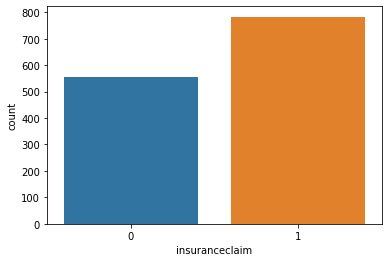

In [34]:
#check count of each insuranceclaim

sns.countplot(x= 'insuranceclaim',data = sbi)
plt.show()

In [35]:
#separate Input & o/p varaible

sbi_x = sbi.drop(columns = ["insuranceclaim"])
print(sbi_x.shape)
sbi_y = sbi[["insuranceclaim"]]
print(sbi_y.shape)

(1338, 7)
(1338, 1)


In [47]:
# def maxf1_score(clf,sbi_x,sbi_y):
#     maxf = 0
#     rs =0 
#     for r_state in range(42,100):
#         x_train.x_test,y_train,y_test = train_test_split(sbi_x,sbi_y,random_state = r_state,test_size = 0.20)
        
#         clf.fit(x_train,y_train)
#         y_pred = clf.predict(x_test)
#         tmp = f1_score(y_test,y_pred)
        
#         if tmp>maxf:
#             maxf=tmp
#             rs = r_state
#     print("max f1 score:",rs,"and its:" ,maxf)

In [48]:
# df_models = pd.DataFrame(columns=["model","f1_score","std"])

# models = list()
# f1_scr = list()
# std = list()

In [49]:
# #use logistic regression

# log_reg = LogisticRegression()
# maxf1_score(log_reg,sbi_x,sbi_y)

ValueError: too many values to unpack (expected 3)

In [14]:
# #skewness treating using log
# for col in sbi.columns:
#     if sbi.skew().loc[col]>0.55:
#         sbi[col]=np.log1p(sbi[col])
    

In [15]:
# #check skewness again

# sbi.skew()

age               0.055673
sex              -0.020951
bmi               0.284047
children          0.264083
smoker            1.464766
region           -0.038101
charges          -0.089817
insuranceclaim   -0.346254
dtype: float64

In [55]:
x_train,x_test,y_train,y_test = train_test_split(sbi_x,sbi_y,test_size =.22,random_state = 42)

In [56]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1043, 7) (295, 7) (1043, 1) (295, 1)


In [57]:
knn = KNeighborsClassifier(n_neighbors=6)
sv =SVC(kernel = 'rbf')
lr = LogisticRegression()
dt = DecisionTreeClassifier(random_state = 6)
gnb = GaussianNB()
#mnb = MultinomialNB()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

In [58]:
models = []
models.append(('KNeighborsClassifier',knn))
models.append(('SVC',sv))
models.append(('LogisticRegression', lr))
models.append(('DecisionTreeClassifier', dt))
models.append(('GaussianNB',gnb))
#models.append(('MultinomialNB',mnb))
models.append(('RandomForestClassifier',rf))
models.append(('GradientBosstingClassifier',gb))

"""""""""""""""""""""""""" KNeighborsClassifier """""""""""""""""""""""""""""


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy_score= 0.6


cross_val_score= 0.6233251038042867


roc_auc_score= 0.6059322033898306


classification_report
               precision    recall  f1-score   support

           0       0.50      0.64      0.56       118
           1       0.70      0.58      0.63       177

    accuracy                           0.60       295
   macro avg       0.60      0.61      0.60       295
weighted avg       0.62      0.60      0.60       295



[[ 75  43]
 [ 75 102]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



"""""""""""""""""""""""""" SVC """""""""""""""""""""""""""""


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',


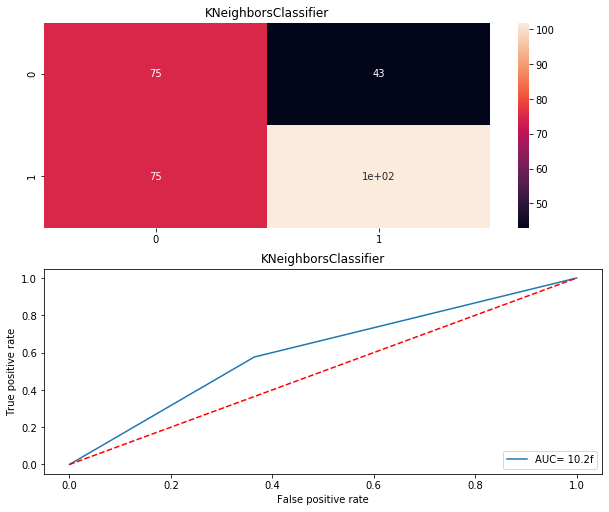

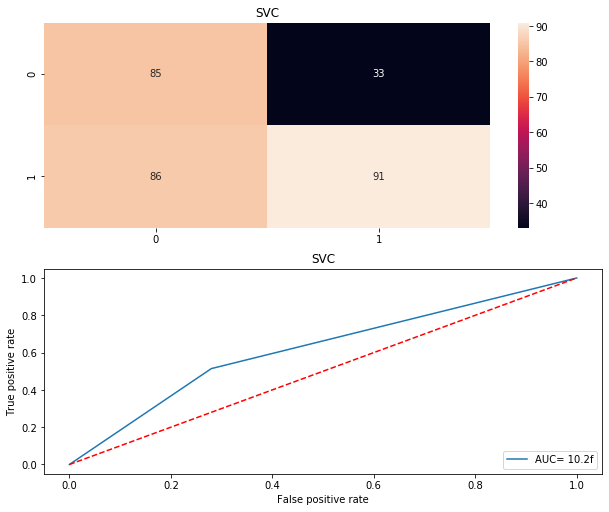

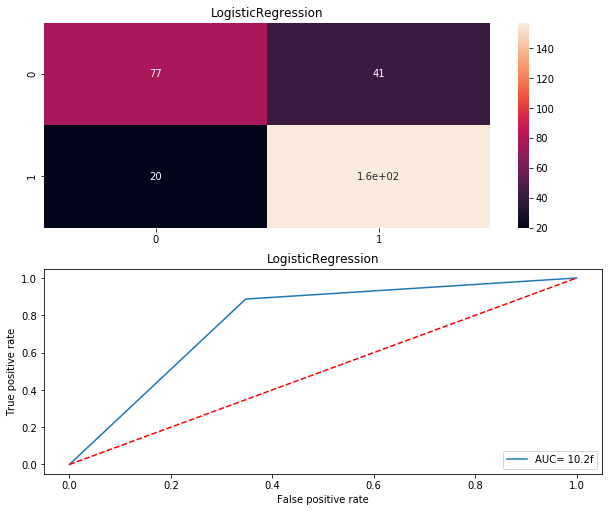

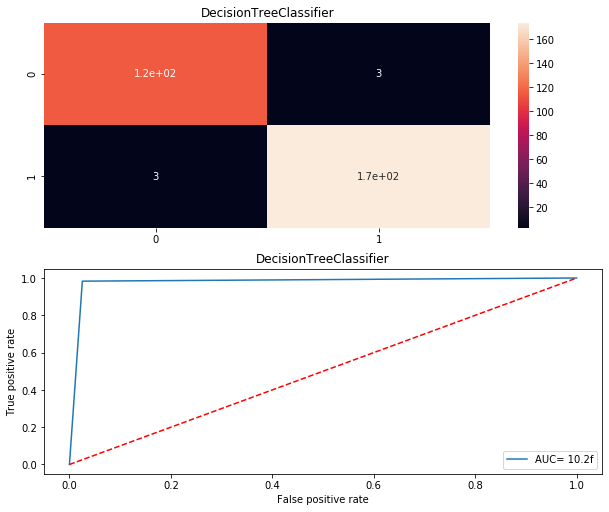

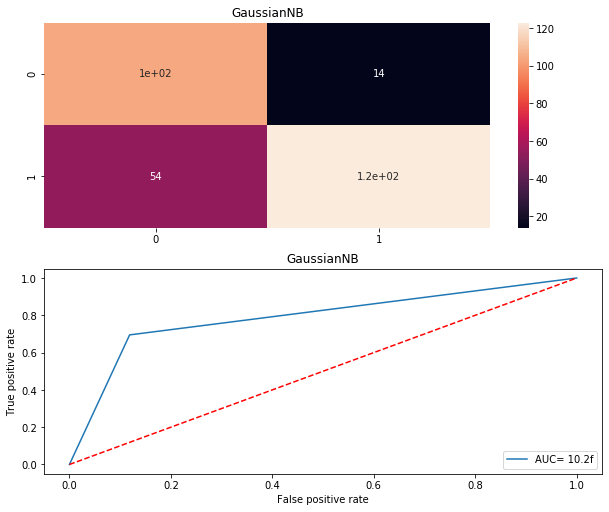

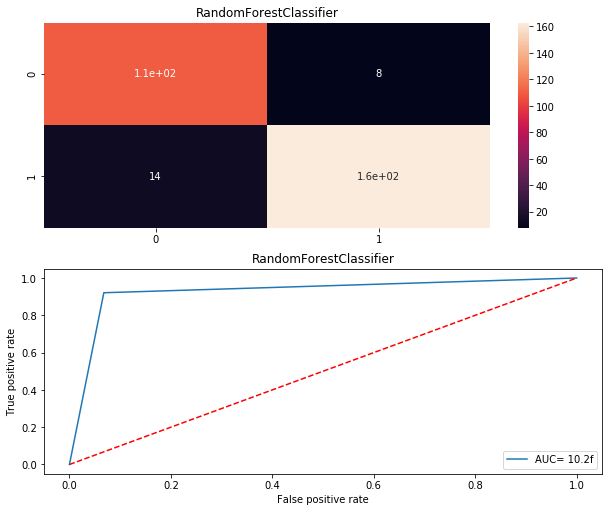

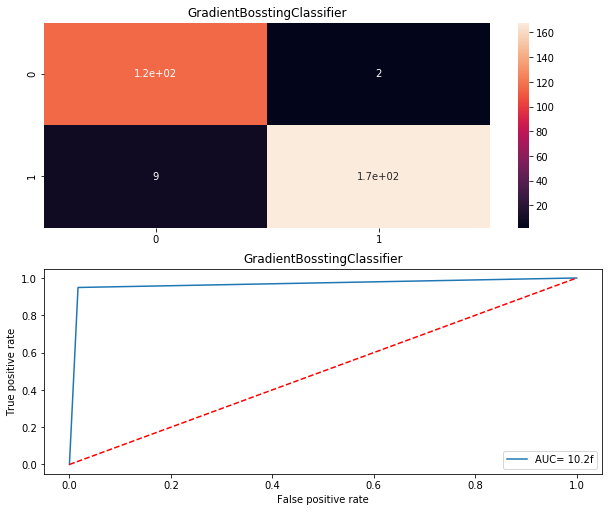

In [60]:
Model = []
score =[]
cvs = []
rocscore = []
for name,model in models:
    print ('""""""""""""""""""""""""""',name,'"""""""""""""""""""""""""""""')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre = model.predict(x_test)
    print('\n')
    AS = accuracy_score(y_test,pre)
    print('Accuracy_score=',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model,sbi_x,sbi_y,cv=10,scoring = 'accuracy').mean()
    
    print('cross_val_score=',sc)
    cvs.append(sc*100)
    
    print('\n')
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,pre)
    
    roc_auc = auc(false_positive_rate,true_positive_rate)
    
    print('roc_auc_score=',roc_auc)
    
    rocscore.append(roc_auc*100)
    
    print('\n')
    
    print('classification_report\n',classification_report(y_test,pre))
    
    print('\n')
    
    cm = confusion_matrix(y_test,pre)
    
    print(cm)
    
    print('\n')
    
    plt.figure(figsize = (10,40))
    plt.subplot(911)
    
    plt.title(name)
    
    print(sns.heatmap(cm,annot = True))
    
    plt.subplot(912)
    
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label = 'AUC= 10.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    
    plt.legend(loc= 'lower right')
    plt.ylabel('True positive rate')
    
    plt.xlabel('False positive rate')
    
    print('\n\n')
    
    
    
    
    

In [65]:
result = pd.DataFrame({'Model': Model,'Accuracy Score':score,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result


,Model,Accuracy Score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,60.000000,62.332510,60.593220
1,SVC,59.661017,62.031759,61.723164
2,LogisticRegression,79.322034,80.191898,76.977401
3,DecisionTreeClassifier,97.966102,97.683201,97.881356
4,GaussianNB,76.949153,77.353271,78.813559
5,RandomForestClassifier,92.542373,95.514533,92.655367
6,GradientBosstingClassifier,96.271186,98.055774,96.610169


In [66]:
from sklearn.externals import joblib
joblib.dump(dt,'sbidatasetauthentication.csv')


['sbidatasetauthentication.csv']

In [67]:
model=joblib.load('sbidatasetauthentication.csv')

model.predict(x_test)

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0], dtype=int64)